# Data preparation and processing

In [42]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

import os.path
from tensorflow.keras.models import load_model

In [34]:
train_labels = []
train_samples = []

Example Data:
An experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older. 95% of patients 65 or older experienced side effects, and around 95% of patients under 65 experienced no side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

The block of code below shows how to generate this dummy data:

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples:
    print(i)

51
82
51
69
23
92
20
95
51
71
43
99
35
88
27
70
19
100
22
100
17
85
51
96
42
66
59
94
52
71
58
69
17
75
29
100
35
87
59
68
23
78
54
93
49
74
14
70
26
89
35
86
37
97
14
65
19
89
26
76
64
89
31
78
53
66
30
90
64
87
47
96
42
76
39
98
32
66
29
87
19
99
57
82
59
99
28
87
14
77
13
73
64
83
25
68
44
85
48
72
47
72
33
66
30
84
58
89
32
89
29
79
24
83
42
69
54
80
46
80
14
93
57
97
40
88
61
87
29
71
28
84
24
71
18
94
40
68
16
98
56
78
33
81
41
80
41
93
27
73
44
90
23
87
17
66
40
86
42
89
44
91
56
77
62
66
63
97
63
67
30
80
26
97
57
94
47
85
51
84
30
75
51
68
21
73
20
67
36
77
25
77
62
90
27
67
34
98
46
92
53
99
38
70
24
81
26
75
38
86
53
84
59
97
53
94
50
78
40
79
14
98
58
79
21
96
49
74
45
76
31
87
27
100
28
80
49
92
26
80
46
82
52
93
16
100
46
68
29
99
26
65
58
89
43
74
17
76
60
91
20
95
44
80
19
88
43
91
61
75
41
67
29
84
31
84
64
90
23
78
56
79
37
93
27
86
46
72
24
69
53
83
28
81
18
87
41
98
60
96
42
78
22
73
15
83
63
94
17
67
15
87
52
85
50
93
27
88
58
67
13
85
64
72
25
95
35
77
33
100
58
6

In [5]:
for i in train_labels:
    print(i)

1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [8]:
for i in scaled_train_samples:
    print(i)

[1.]
[0.89655172]
[0.81609195]
[0.85057471]
[0.11494253]
[0.52873563]
[0.54022989]
[0.97701149]
[0.16091954]
[0.75862069]
[0.06896552]
[0.44827586]
[0.88505747]
[0.08045977]
[0.71264368]
[0.74712644]
[0.93103448]
[0.89655172]
[0.11494253]
[0.12643678]
[0.27586207]
[0.89655172]
[0.85057471]
[0.7816092]
[0.04597701]
[0.63218391]
[0.47126437]
[0.67816092]
[0.13793103]
[0.66666667]
[0.89655172]
[0.79310345]
[0.18390805]
[0.37931034]
[0.04597701]
[0.97701149]
[0.74712644]
[0.79310345]
[0.04597701]
[0.96551724]
[0.86206897]
[0.37931034]
[0.65517241]
[0.20689655]
[0.64367816]
[0.73563218]
[0.16091954]
[0.43678161]
[0.01149425]
[0.42528736]
[0.02298851]
[0.09195402]
[0.14942529]
[0.54022989]
[0.95402299]
[0.57471264]
[0.45977011]
[0.82758621]
[0.03448276]
[0.83908046]
[0.33333333]
[0.57471264]
[0.74712644]
[0.54022989]
[0.81609195]
[0.3908046]
[0.42528736]
[0.63218391]
[0.49425287]
[0.94252874]
[0.95402299]
[0.8045977]
[0.10344828]
[0.02298851]
[0.77011494]
[0.28735632]
[0.72413793]
[0.9310344

[0.52873563]
[0.63218391]
[0.40229885]
[0.81609195]
[0.02298851]
[0.98850575]
[0.86206897]
[0.62068966]
[0.36781609]
[0.50574713]
[0.68965517]
[0.22988506]
[0.05747126]
[0.96551724]
[0.42528736]
[0.4137931]
[0.44827586]
[0.67816092]
[0.5862069]
[0.83908046]
[0.89655172]
[0.55172414]
[0.49425287]
[0.16091954]
[0.93103448]
[0.5862069]
[0.6091954]
[0.91954023]
[0.10344828]
[0.36781609]
[0.49425287]
[0.98850575]
[0.48275862]
[0.20689655]
[0.36781609]
[0.45977011]
[0.71264368]
[0.81609195]
[0.62068966]
[0.66666667]
[0.97701149]
[0.83908046]
[0.34482759]
[0.45977011]
[0.22988506]
[0.35632184]
[0.40229885]
[0.82758621]
[0.68965517]
[0.70114943]
[0.06896552]
[0.24137931]
[0.50574713]
[0.96551724]
[1.]
[0.87356322]
[0.94252874]
[0.55172414]
[0.57471264]
[0.67816092]
[0.82758621]
[0.7816092]
[0.49425287]
[0.70114943]
[0.29885057]
[0.42528736]
[0.40229885]
[0.32183908]
[0.01149425]
[0.31034483]
[0.72413793]
[0.81609195]
[0.71264368]
[0.06896552]
[0.71264368]
[0.37931034]
[0.49425287]
[0.12643678]

# Simple tf.Karas Sequencial Model:

In [10]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.2405 - accuracy: 0.9450 - val_loss: 0.1636 - val_accuracy: 0.9714 - 255ms/epoch - 1ms/step
Epoch 2/30
189/189 - 0s - loss: 0.2404 - accuracy: 0.9481 - val_loss: 0.1625 - val_accuracy: 0.9667 - 223ms/epoch - 1ms/step
Epoch 3/30
189/189 - 0s - loss: 0.2404 - accuracy: 0.9450 - val_loss: 0.1623 - val_accuracy: 0.9667 - 221ms/epoch - 1ms/step
Epoch 4/30
189/189 - 0s - loss: 0.2402 - accuracy: 0.9471 - val_loss: 0.1617 - val_accuracy: 0.9667 - 220ms/epoch - 1ms/step
Epoch 5/30
189/189 - 0s - loss: 0.2401 - accuracy: 0.9434 - val_loss: 0.1628 - val_accuracy: 0.9714 - 223ms/epoch - 1ms/step
Epoch 6/30
189/189 - 0s - loss: 0.2399 - accuracy: 0.9450 - val_loss: 0.1627 - val_accuracy: 0.9714 - 221ms/epoch - 1ms/step
Epoch 7/30
189/189 - 0s - loss: 0.2400 - accuracy: 0.9487 - val_loss: 0.1613 - val_accuracy: 0.9667 - 223ms/epoch - 1ms/step
Epoch 8/30
189/189 - 0s - loss: 0.2398 - accuracy: 0.9423 - val_loss: 0.1609 - val_accuracy: 0.9667 - 224ms/epoch - 1ms/step


In [19]:
test_labels =  []
test_samples = []

In [20]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [21]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [22]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

# Predict

In [25]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [24]:
for i in predictions:
    print(i)

[0.965151   0.03484905]
[0.84003466 0.15996529]
[0.94645035 0.05354969]
[0.96526873 0.03473125]
[0.95877314 0.04122686]
[0.40132216 0.5986778 ]
[0.9623028  0.03769719]
[0.9631388  0.03686118]
[0.04946117 0.9505389 ]
[0.96443194 0.03556804]
[0.01390441 0.9860956 ]
[0.9570766  0.04292342]
[0.03364727 0.9663527 ]
[0.40132216 0.5986778 ]
[0.95492846 0.04507157]
[0.01032444 0.9896756 ]
[0.02769347 0.97230655]
[0.03053013 0.9694699 ]
[0.04082734 0.9591727 ]
[0.96144855 0.03855139]
[0.95831025 0.04168972]
[0.5710629  0.42893708]
[0.9639447  0.03605529]
[0.9649129  0.03508714]
[0.9631388  0.03686118]
[0.96526873 0.03473125]
[0.25235194 0.74764806]
[0.94645035 0.05354969]
[0.90289193 0.0971081 ]
[0.9592311  0.04076893]
[0.84003466 0.15996529]
[0.96501535 0.03498468]
[0.03707052 0.9629294 ]
[0.07917223 0.92082775]
[0.9592311  0.04076893]
[0.96144855 0.03855139]
[0.9643811 0.0356189]
[0.04082734 0.9591727 ]
[0.95689166 0.0431083 ]
[0.08681112 0.9131889 ]
[0.10411364 0.89588636]
[0.9175545 0.08244

In [26]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
0
0
1
0
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
0
0
1
0
1
1
0
1
0
1
1
0
0
0
1
0
0
0
1
1
0
1
0
0
0
0
1
0
1
1
0
1
0
1
1
1
1
1
0
1
1
0
0
0
0
0
1
1
0
1
1
0
1
0
0
0
1
1
1
0
0
1
1
1
0
0
0
1
0
0
0
1
1
0
0
1
1
1
1
1
0
1
1
1
0
1
1
0
1
1
1
0
1
1
1
1
0
0
1
1
0
0
0
0
0
0
1
1
1
1
1
0
0
1
1
0
0
0
0
1
0
1
0
1
0
0
1
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
1
1
1
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
1
1
0
0
1
1
1
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
1
0
1
1
0
1
1
1
1
1
0
0
1
0
0
0
1
1
0
0
1
1
0
1
0
1
1
0
0
1
1
1
1
1
0
1
1
1
0
0
1
1
0
1
1
1
0
0
1
0
0
0
0
0
0
1
0
0
0
1
0
0
0
1
1
1
0
0
1
0
0
0
0
1
1
0
0
0
1
1
0
0
0
0
1
1
1
1
1
1
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
1
1
0
1
1
0
0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
0
0
1
1
1
0
1
0
0
1
1
1
1
1
0
1
1
1
1


In [29]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [30]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
cm_plot_labels = ['no_side_effects','had_side_effects']

Confusion matrix, without normalization
[[195  15]
 [ 10 200]]


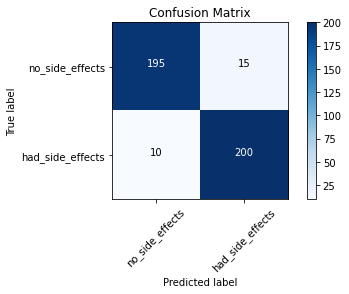

In [32]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [48]:
# check first to see if the file is saved already.
# if not, then save the file.
#if os.path.isfile('Models\med_trail_model.h5') is false:
model.save('Models/medical_trial_model.h5')


In [49]:
new_model = load_model('Models/medical_trial_model.h5')

In [50]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.optimizer

In [52]:
model.loss

'sparse_categorical_crossentropy'

In [53]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [54]:
model.save_weights('models/my_model_weights.h5')

In [55]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')

In [56]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________
